
# **2. Dimensionality Reduction**


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/heart_disease.csv")
df_clean = pd.read_csv("../data/heart_disease_clean.csv")


**2.1 Applying PCA**

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_clean.drop(columns='num')
# Use the original 'num' column from the df DataFrame for discrete labels
y = df_clean['num']


X_scaled = StandardScaler().fit_transform(X)

# Initialize PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# pca transformed dataset
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca['num'] = y
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,num
0,1.130664,-1.087655,3.164263,2.293052,0.023175,0.578814,0.664854,-0.536787,-1.495392,-0.499485,0.337585,0.479583,0.140637,-0.767668
1,3.190926,-1.417885,-0.533715,-0.857970,-0.006289,0.745347,-0.259063,1.069777,0.342524,1.431509,-1.145257,-0.891418,1.022265,0.855089
2,3.124339,0.657008,-0.285134,-0.626641,0.152793,1.130179,-0.324995,0.209299,0.043205,0.462304,0.431665,0.863228,-0.202336,0.043711
3,-0.484339,1.410972,0.397806,2.832741,0.721309,-0.388361,-0.522221,-2.153525,0.760079,0.228379,-1.545065,0.342960,0.588380,-0.767668
4,-2.284542,-0.330033,-0.072260,1.209318,0.770835,0.625587,0.379567,0.014736,1.050381,0.628110,0.797211,-0.322946,-1.150352,-0.767668


**2.2 Determine optimal number of components**

In [12]:
# Explained variance ratio
explained_var = pca.explained_variance_ratio_
cum_var = explained_var.cumsum()

# Print variance explained by first few components
for i, var in enumerate(explained_var[:10], start=1):
    print(f"PC{i}: {var:.3f}, cumulative: {cum_var[i-1]:.3f}")

PC1: 0.237, cumulative: 0.237
PC2: 0.123, cumulative: 0.360
PC3: 0.096, cumulative: 0.456
PC4: 0.085, cumulative: 0.542
PC5: 0.076, cumulative: 0.618
PC6: 0.067, cumulative: 0.685
PC7: 0.065, cumulative: 0.750
PC8: 0.060, cumulative: 0.810
PC9: 0.053, cumulative: 0.863
PC10: 0.044, cumulative: 0.906


2.3 Visualize Cumulative variance

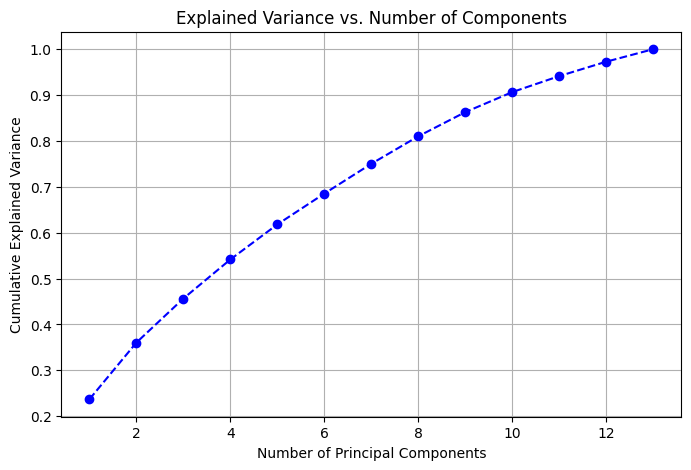

In [13]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker="o", linestyle="--", color="b")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid(True)
plt.show()

**2.4 Scatter plot of first two PCs**

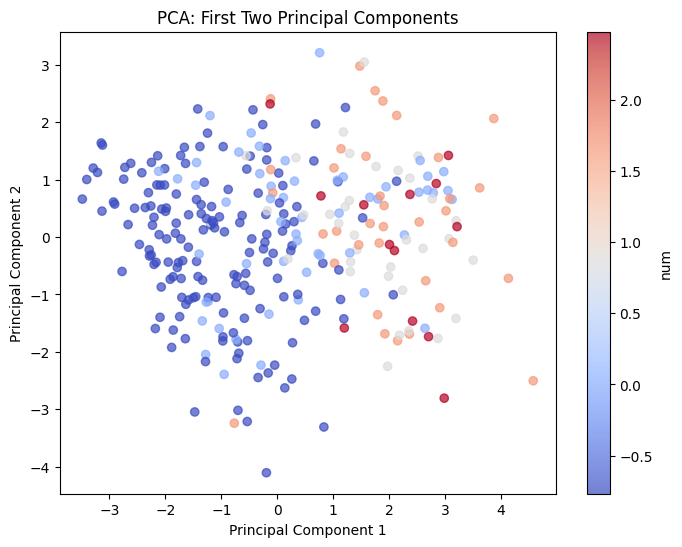

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c= y, cmap="coolwarm", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: First Two Principal Components")
plt.colorbar(label="num")
plt.show()



---

